In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
from sklearn.model_selection import cross_val_score
import numpy as np

def compute_score(clf, X: pd.DataFrame, y: pd.Series) -> float:
  xval = cross_val_score(clf, X, y, cv = 5)
  return np.mean(xval)

Load data

We remove the coluln that are useless

In [3]:
df_base = pd.read_json('report2.json')

del df_base['_id']
del df_base['instance']
del df_base['date']
del df_base['network']
del df_base['rdns_name']
del df_base['headers']
#del df_base['rdns']
del df_base['rdns_spoofed']
del df_base['as_org']
del df_base['c_code']
#del df_base['as_id']

df_base

,reason,method,url,con_code,as_id,rdns
0,modsecurity,GET,/wp-admin/install.php?id=/etc/passwd,6255148,3215,[80.13.175.148]
1,modsecurity,GET,/wp-admin/install.php,6255148,3215,[80.13.175.148]
2,modsecurity,GET,/wp-admin/install.php?id=/etc/passwd,6255148,3215,[80.13.175.148]
3,modsecurity,GET,/aaa?id=%27%20OR%201%20=%201%20--,6255148,3215,[80.13.175.148]
4,good,GET,/wp-admin/js/language-chooser.min.js?ver=4.8.3,6255148,12322,[91.169.189.146]
...,...,...,...,...,...,...
5110,default,GET,/index.php?s=/Index/\think\app/invokefunction&...,6255148,60930,[45.9.20.101]
5111,default,GET,/?a=fetch&content=<php>die(@md5(HelloThinkCMF)...,6255148,60930,[45.9.20.101]
5112,default,GET,/,6255149,21859,[128.1.248.42]
5113,default,GET,/,6255147,396982,[198.235.24.156]


We create others columns for the url to create differents filters

In [30]:
df_base['url_%'] = df_base['url']
df_base['url_shell'] = df_base['url']
df_base['url_jpg'] = df_base['url']
df_base['url_png'] = df_base['url']
df_base['url_jpeg'] = df_base['url']
df_base['url_gif'] = df_base['url']
df_base['url_css'] = df_base['url']
df_base['url_svg'] = df_base['url']
df_base['url_/tmp'] = df_base['url']
df_base['url_env'] = df_base['url']

we modify the value in url

I-visualize data

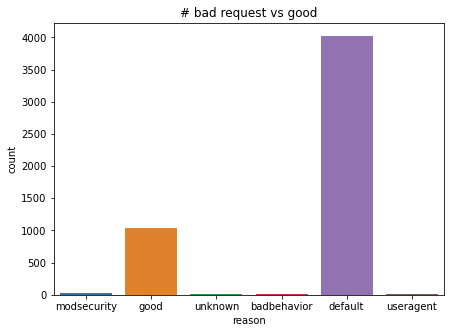

In [31]:
f, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x='reason', data=df_base)
_ = plt.title('# bad request vs good')
_ = plt.xlabel('reason')

See the iterance of categorical value

II-we check the accuracy

In [32]:
df = df_base
df['reason'].mask(df['reason'] != 'good', 1, inplace=True)
df['reason'].mask(df['reason'] == 'good', 0, inplace=True)
df['reason']=df['reason'].astype(int)
base_line_accuracy = 1-np.sum(df.reason)/df.shape[0]
base_line_accuracy


0.20156402737047896

In [33]:
#admin
df.loc[df['url'].str.contains('admin'), 'url'] = 'admin'
df['url'].mask(df['url'] != 'admin', 0, inplace=True)
df['url'].mask(df['url'] == 'admin', 1, inplace=True)

# %
df.loc[df['url_%'].str.contains('%'), 'url_%'] = '%'
df['url_%'].mask(df['url_%'] != '%', 0, inplace=True)
df['url_%'].mask(df['url_%'] == '%', 1, inplace=True)

#shell
df.loc[df['url_shell'].str.contains('shell'), 'url_shell'] = 'shell'
df['url_shell'].mask(df['url_shell'] != 'shell', 0, inplace=True)
df['url_shell'].mask(df['url_shell'] == 'shell', 1, inplace=True)

# .jpg
df.loc[df['url_jpg'].str.contains('.jpg'), 'url_jpg'] = '.jpg'
df['url_jpg'].mask(df['url_jpg'] != '.jpg', 0, inplace=True)
df['url_jpg'].mask(df['url_jpg'] == '.jpg', 1, inplace=True)

# .jpeg
df.loc[df['url_jpeg'].str.contains('.jpeg'), 'url_jpeg'] = '.jpeg'
df['url_jpeg'].mask(df['url_jpeg'] != '.jpeg', 0, inplace=True)
df['url_jpeg'].mask(df['url_jpeg'] == '.jpeg', 1, inplace=True)

# .png
df.loc[df['url_png'].str.contains('.png'), 'url_png'] = '.png'
df['url_png'].mask(df['url_png'] != '.png', 0, inplace=True)
df['url_png'].mask(df['url_png'] == '.png', 1, inplace=True)

# .gif
df.loc[df['url_gif'].str.contains('.gif'), 'url_gif'] = '.gif'
df['url_gif'].mask(df['url_gif'] != '.gif', 0, inplace=True)
df['url_gif'].mask(df['url_gif'] == '.gif', 1, inplace=True)

# .svg
df.loc[df['url_svg'].str.contains('.svg'), 'url_svg'] = '.svg'
df['url_svg'].mask(df['url_svg'] != '.svg', 0, inplace=True)
df['url_svg'].mask(df['url_svg'] == '.svg', 1, inplace=True)

# .css
df.loc[df['url_css'].str.contains('.css'), 'url_css'] = '.css'
df['url_css'].mask(df['url_css'] != '.css', 0, inplace=True)
df['url_css'].mask(df['url_css'] == '.css', 1, inplace=True)

# /tmp
df.loc[df['url_/tmp'].str.contains('/tmp'), 'url_/tmp'] = '/tmp'
df['url_/tmp'].mask(df['url_/tmp'] != '/tmp', 0, inplace=True)
df['url_/tmp'].mask(df['url_/tmp'] == '/tmp', 1, inplace=True)

# .env
df.loc[df['url_env'].str.contains('.env'), 'url_env'] = '.env'
df['url_env'].mask(df['url_env'] != '.env', 0, inplace=True)
df['url_env'].mask(df['url_env'] == '.env', 1, inplace=True)


III-separe the categorical values

In [34]:
#modification of the get dummies

df['method_GET']=df['method']
df['method_HEAD']=df['method']
df['method_OPTIONS']=df['method']
df['method_POST']=df['method']
del df['method']

#GET
df['method_GET'].mask(df['method_GET'] != 'GET', 0, inplace=True)
df['method_GET'].mask(df['method_GET'] == 'GET', 1, inplace=True)

# HEAD
df['method_HEAD'].mask(df['method_HEAD'] != 'HEAD', 0, inplace=True)
df['method_HEAD'].mask(df['method_HEAD'] == 'HEAD', 1, inplace=True)

#OPTIONS
df['method_OPTIONS'].mask(df['method_OPTIONS'] != 'OPTIONS', 0, inplace=True)
df['method_OPTIONS'].mask(df['method_OPTIONS'] == 'OPTIONS', 1, inplace=True)

# POST
df['method_POST'].mask(df['method_POST'] != 'POST', 0, inplace=True)
df['method_POST'].mask(df['method_POST'] == 'POST', 1, inplace=True)
df.head()

,reason,url,con_code,as_id,url_%,url_shell,url_jpg,url_png,url_jpeg,url_gif,url_css,url_svg,url_/tmp,url_env,method_GET,method_HEAD,method_OPTIONS,method_POST
0,1,1,6255148,3215,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,1,6255148,3215,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,1,6255148,3215,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,0,6255148,3215,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,6255148,12322,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5115 entries, 0 to 5114
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reason          5115 non-null   int64 
 1   url             5115 non-null   object
 2   con_code        5115 non-null   int64 
 3   as_id           5115 non-null   int64 
 4   url_%           5115 non-null   object
 5   url_shell       5115 non-null   object
 6   url_jpg         5115 non-null   object
 7   url_png         5115 non-null   object
 8   url_jpeg        5115 non-null   object
 9   url_gif         5115 non-null   object
 10  url_css         5115 non-null   object
 11  url_svg         5115 non-null   object
 12  url_/tmp        5115 non-null   object
 13  url_env         5115 non-null   object
 14  method_GET      5115 non-null   uint8 
 15  method_HEAD     5115 non-null   uint8 
 16  method_OPTIONS  5115 non-null   uint8 
 17  method_POST     5115 non-null   uint8 
dtypes: int64

IV- Splitting into Training and Test set

In [36]:
X = df.drop(columns='reason', axis=1) 
y = df.reason.values

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [37]:
X_train

,url,con_code,as_id,url_%,url_shell,url_jpg,url_png,url_jpeg,url_gif,url_css,url_svg,url_/tmp,url_env,method_GET,method_HEAD,method_OPTIONS,method_POST
92,0,6255149,398324,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4680,0,6255149,16509,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4383,0,6255148,3269,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3167,0,6255148,202306,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4479,0,6255147,9121,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0,6255147,133661,0,0,0,0,0,0,0,0,1,0,1,0,0,0
466,1,6255148,12322,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3092,0,6255149,398722,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3772,0,6255148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [38]:
X_test

,url,con_code,as_id,url_%,url_shell,url_jpg,url_png,url_jpeg,url_gif,url_css,url_svg,url_/tmp,url_env,method_GET,method_HEAD,method_OPTIONS,method_POST
530,0,6255148,15557,0,0,1,0,0,0,0,0,0,0,1,0,0,0
5001,0,6255149,14061,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3058,0,6255148,63949,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1340,0,6255149,14618,0,0,0,0,0,0,0,0,0,1,1,0,0,0
4904,0,6255149,8075,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0,6255148,203020,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2523,0,6255148,208843,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1539,0,6255149,8560,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1454,0,6255148,15169,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [39]:
y_train

array([0, 1, 1, ..., 1, 1, 0])

In [40]:
y_test

array([0, 1, 1, ..., 1, 1, 1])

In [41]:
scaler = StandardScaler()
lr = LogisticRegression()
model1 = Pipeline([('standardize', scaler),
                    ('log_reg', lr)])

In [42]:
model1.fit(X_train, y_train)

Pipeline(steps=[('standardize', StandardScaler()),
                ('log_reg', LogisticRegression())])

Training score

In [43]:
y_train_hat = model1.predict(X_train)
y_train_hat_probs = model1.predict_proba(X_train)[:,1]

train_accuracy = accuracy_score(y_train, y_train_hat)*100
train_auc_roc = roc_auc_score(y_train, y_train_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_train, y_train_hat))

print('Training AUC: %.4f %%' % train_auc_roc)

print('Training accuracy: %.4f %%' % train_accuracy)

Confusion matrix:
 [[ 460  289]
 [ 105 2982]]
Training AUC: 90.3715 %
Training accuracy: 89.7289 %


Testing score

In [44]:
y_test_hat = model1.predict(X_test)
y_test_hat_probs = model1.predict_proba(X_test)[:,1]

test_accuracy = accuracy_score(y_test, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))

print('Testing AUC: %.4f %%' % test_auc_roc)

print('Testing accuracy: %.4f %%' % test_accuracy) 

Confusion matrix:
 [[170 112]
 [ 31 966]]
Testing AUC: 90.7282 %
Testing accuracy: 88.8194 %


In [45]:
print(classification_report(y_test, y_test_hat, digits=6))

              precision    recall  f1-score   support

           0   0.845771  0.602837  0.703934       282
           1   0.896104  0.968907  0.931084       997

    accuracy                       0.888194      1279
   macro avg   0.870938  0.785872  0.817509      1279
weighted avg   0.885006  0.888194  0.881001      1279



In [46]:
compute_score(model1, X, y)

0.8932551319648093

In [47]:
modele_logit = LogisticRegression(penalty='none',solver='newton-cg')
modele_logit.fit(X_train,y_train)

/Users/nathanfonteyne/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/nathanfonteyne/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/nathanfonteyne/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/nathanfonteyne/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/nathanfonteyne/opt/anaconda3/lib/python3.9/site-packages/scipy/op

LogisticRegression(penalty='none', solver='newton-cg')

In [48]:
pd.DataFrame(np.concatenate([modele_logit.intercept_.reshape(-1,1),
                             modele_logit.coef_],axis=1),
             index = ["coef"],
             columns = ["constante"]+list(X_train.columns)).T

,coef
constante,2.236500e-07
url,-2.136748e+00
con_code,2.035610e-07
as_id,3.676267e-05
url_%,-1.586096e+00
url_shell,8.709555e-01
url_jpg,-2.892984e+00
url_png,-1.651889e+00
url_jpeg,0.000000e+00
url_gif,-1.286474e+00


Random Forest

In [49]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=1000)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

compute_score(regressor, X, y)

0.9642228739002933

testing score

In [50]:
y_test_hat = regressor.predict(X_test)
y_test_hat_probs = regressor.predict_proba(X_test)[:,1]

test_accuracy = accuracy_score(y_test, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))

print('Testing AUC: %.4f %%' % test_auc_roc)

print('Testing accuracy: %.4f %%' % test_accuracy) 

Confusion matrix:
 [[276   6]
 [ 20 977]]
Testing AUC: 99.5241 %
Testing accuracy: 97.9672 %


In [51]:
print(classification_report(y_test, y_test_hat, digits=6))

              precision    recall  f1-score   support

           0   0.932432  0.978723  0.955017       282
           1   0.993896  0.979940  0.986869       997

    accuracy                       0.979672      1279
   macro avg   0.963164  0.979332  0.970943      1279
weighted avg   0.980344  0.979672  0.979846      1279



{
  "url": 0.18192182070586682,
  "con_code": 0.0937779932128428,
  "as_id": 0.56373855840948,
  "url_%": 0.02360335757221679,
  "url_shell": 0.0010579010131711883,
  "url_jpg": 0.02286825272521353,
  "url_png": 0.010073571823550781,
  "url_jpeg": 0.0,
  "url_gif": 0.00616777148080991,
  "url_css": 0.04998202378489943,
  "url_svg": 0.007385966562177842,
  "url_/tmp": 0.002220475197838708,
  "url_env": 0.023589166878415772,
  "method_GET": 0.004052576749018155,
  "method_HEAD": 0.00123038571940519,
  "method_OPTIONS": 0.000763185623958124,
  "method_POST": 0.007566992541135028
}


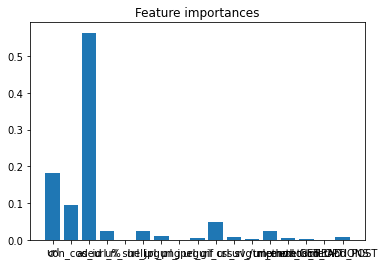

In [52]:
import json

def plot_var_weights_logistic_regression(X, y):
  regressor = RandomForestClassifier(n_estimators=1000)
  regressor.fit(X, y)

  columns = np.array(X.columns)
  weights = np.array(regressor.feature_importances_)

  # weights dictonary sorted by absolute value
  weights_dict = dict(zip(columns, weights))
  print(json.dumps(weights_dict, indent = 2))

  # plot the weights
  plt.bar(columns, weights)
  plt.title('Feature importances')
  plt.show()

plot_var_weights_logistic_regression(X, y)